### In this project eligibility of the customer for lending a loan at LendingClub.com is predicted

#### Model uses Random Forest for prediction

### 1. Data Description

COLUMN DESCRIPTION

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### 2. Required Libraries

In [1]:
%config IPCompleter.greedy = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### 3. Data Acquisition

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Key Observations:
- 80.5% customers met Credit eligibility criteria (Total Customers of sample: 9578)
- 12.3% is the average interest rate
- 25% customers have interest rate less than 10.4%
- 50% customers have interest rate below 12.2%
- 75% customers have interest rate below 14%
- 25% customers have fico score below 682
- 50% of customers have fico score higher than 706
- 25% customers have fico score above 737

### 4. Data Analysis

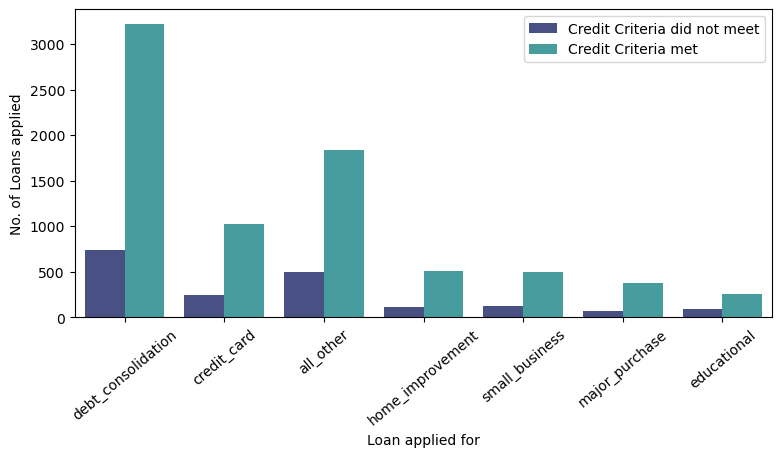

In [6]:
plt.figure(figsize=(9,4))
sns.countplot(x = 'purpose', data = df, hue = 'credit.policy', palette= 'mako')
plt.xlabel (xlabel= 'Loan applied for')
plt.ylabel (ylabel= 'No. of Loans applied')
plt.legend(labels = ['Credit Criteria did not meet', 'Credit Criteria met'])
plt.xticks (rotation = 40)
plt.show()

Most of the loans are applied for debt consolidation

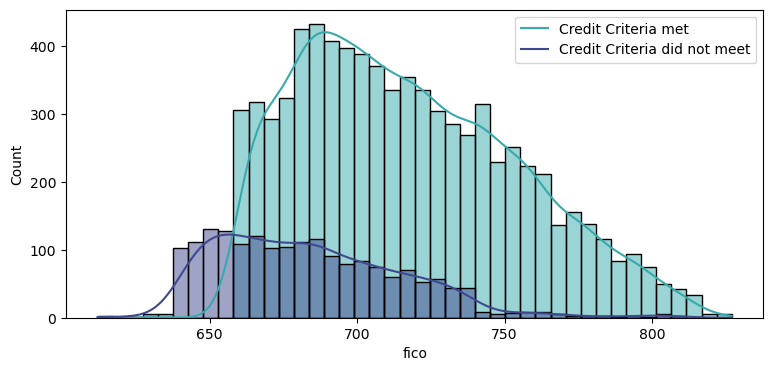

In [7]:
plt.figure(figsize=(9,4))
sns.histplot(x = df['fico'], kde = True, hue = df['credit.policy'], palette= 'mako')
plt.legend(labels = ['Credit Criteria met', 'Credit Criteria did not meet'])

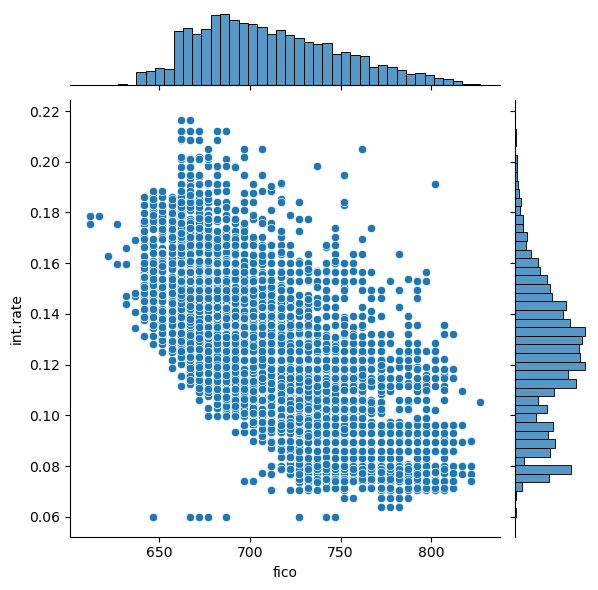

In [8]:
sns.jointplot(x=df['fico'], y = df['int.rate'])

Most of the customer's fico score lies between 670 - 710 and interest rate between 12 - 14%

### 5. Model Creation and Evaluation

In [9]:
#Creating dummy columns for purpose column which have categorical data
df1 = pd.get_dummies(df, drop_first=True)

In [10]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [11]:
# replacing boolean data type with integer
df1['purpose_debt_consolidation'] = df1['purpose_debt_consolidation'].astype(int)

In [12]:
dum_col = df1.columns

In [13]:
dum_col1 = dum_col[13:]

In [14]:
for i in dum_col1:
    df1[i] = df1[i].astype(int)

In [15]:
x = df1.drop('credit.policy', axis = 1)

In [16]:
y = df1['credit.policy']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7662, 18)
(1916, 18)
(7662,)
(1916,)


In [20]:
#Default n_estimators is 100
rf = RandomForestClassifier()

In [21]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(x_test)

In [23]:
y_pred_train = rf.predict(x_train)

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [26]:
test_auc = auc(false_positive_rate, true_positive_rate)

In [27]:
test_auc

0.9745598640592792

Test accuracy: 97.45%

In [28]:
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_train, y_pred_train)

In [29]:
train_auc = auc(false_positive_rate1, true_positive_rate1)

In [30]:
train_auc

1.0

Train accuracy: 100%

Here test accuracy is 97.45% which is good. Parameter tuning is not required. Even though we try parameter tuning (finding optimum n_estimeters) output will not differ noticably

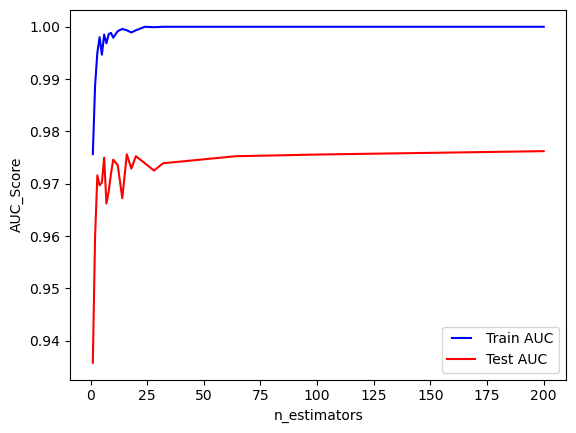

In [31]:
n_estimators = [1, 2,3,4,5,6,7,8,9,10,12,14,16,18,20,24,28,32,64,100,200]
train_results = []
test_results = []
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators= i , n_jobs = 1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1 , = plt.plot(n_estimators, train_results, "b", label = 'Train AUC')
line2 , = plt.plot(n_estimators, test_results, "r", label = 'Test AUC')
plt.legend(handler_map = {line1 : HandlerLine2D(numpoints=2)})
plt.ylabel("AUC_Score")
plt.xlabel("n_estimators")
plt.show()

In [32]:
#from above graph taking n_estimator as 200
rf_optimized = RandomForestClassifier(n_estimators = 200)

In [33]:
rf_optimized.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
y_pred1 = rf_optimized.predict(x_test)

In [35]:
false_positive_rate_opt, true_positive_rate_opt, thresholds_opt = roc_curve(y_test, y_pred1)

In [36]:
test_auc_opt = auc(false_positive_rate, true_positive_rate)

In [37]:
test_auc_opt

0.9762277842776756

After optimization, accuracy is 97.6% and is almost similar as before